### 문제정의
- 손글씨 숫자(0 ~ 9)를 분류하는 모델을 만들어보자.
- 이미지 데이터의 형태를 이해해보자.

### 데이터 수집


In [1]:
import warnings
warnings.filterwarnings('ignore') # warning을 무시하기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('./Data/digit_train.csv', encoding='UTF-8')

data.head()
# label: 정답
# 28 *28 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 전체 데이터 갯수(크기)
data.shape

print(42000/7, 785/7)

6000.0 112.14285714285714


In [4]:
# 데이터 시각화
img0 = data.iloc[0, 1 :] # 첫번째 행의 label을 제외한 모든 컬럼을 가져와서 img0이라는 변수에 저장 


In [5]:
# 리스트 자료형을 28*28dml 2차원으로 변환
img0_reshape = img0.values.reshape(28,28)

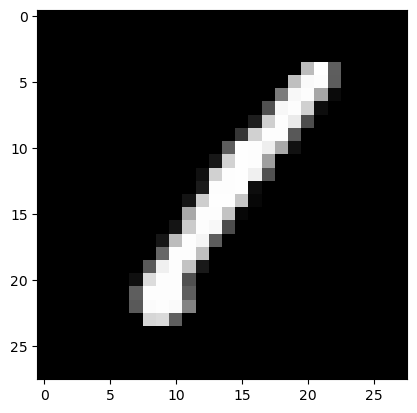

In [6]:
# 이미지 하나 그려보기(행인덱스 0번의 데이터)
# 컬러를 반영하지 않은 gray로 변경 
plt.imshow(img0_reshape, cmap='gray')

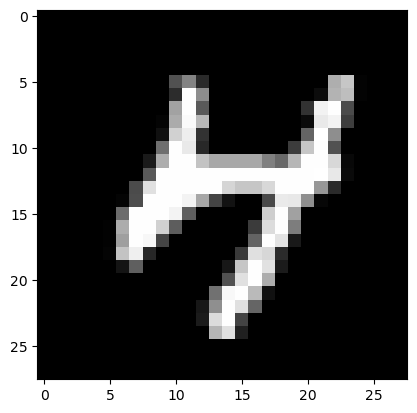

In [7]:
# 33번행의 데이터 가져와서 이미지 그려보기 
img32 = data.iloc[32,1:] 
img32_reshape = img32.values.reshape(28,28)
plt.imshow(img32_reshape, cmap='gray')

### 학습을 위한 데이터 분리 
- 학습 7 : 테스트 3
- random_state = 3

In [8]:
# 6000.0 112.14285714285714

X = data.iloc[:,1:]
y = data.iloc[:,0]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)



print("훈련용 문제 :",X_train.shape)
print("검증용 문제 :",X_test.shape)
print("훈련용 정답 :",y_train.shape)
print("검증용 정답 :",y_test.shape)

훈련용 문제 : (29400, 784)
검증용 문제 : (12600, 784)
훈련용 정답 : (29400,)
검증용 정답 : (12600,)


### 모델 적용
- KNN
- LogisticRegression
- SVM

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

knn_model =  KNeighborsClassifier()
logi_model = LogisticRegression()
svm_model = LinearSVC()

### 학습 및 평가 

In [14]:
# 학습 
knn_model.fit(X_train, y_train)
logi_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# 평가  : score 
print('KNN :', knn_model.score(X_test, y_test))
print('Logistic :', logi_model.score(X_test, y_test))
print('SVM :',svm_model.score(X_test, y_test))

KNN : 0.9762244897959184
Logistic : 0.9428231292517006
SVM : 0.8972108843537415


### 데이터 스케일링 
- 이미지 데이터 : 픽셀정보(0 ~ 255 )
- 1. MinMaxScaler를 사용하여 0 ~ 1 사이의 값으로 모든 픽셀을 조정 
- 2. 스케일링 효과 확인하기
    - 학습(연산) 속도가 개선(빨라짐)
    - 거리기반으로 예측하는 KNN모델은 거의 변화가 없었음
- KNN : 데이터가 많을수록 속도가 느려짐 -> 모든 데이터에 대해 거리를 계산하기 때문에 



In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# 학습 
scaler.fit(X_train)

MinMaxScaler()

In [22]:
# 문제데이터에 스케일링 적용 
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [23]:
# 스케일링 적용데이터 다시 학습 
knn_model.fit(X_train_scale, y_train)
logi_model.fit(X_train_scale, y_train)
svm_model.fit(X_train_scale, y_train)

LinearSVC()

In [25]:
print('KNN :', knn_model.score(X_test_scale, y_test))
print('Logistic :', logi_model.score(X_test_scale, y_test))
print('SVM :',svm_model.score(X_test_scale, y_test))

KNN : 0.9639682539682539
Logistic : 0.9165079365079365
SVM : 0.908015873015873


### 분류평가지표 
- 회귀 : 오차를 기반으로하는 MSE, R2score
- 분류 : 맞춘 개수를 기반으로 평가지표 적용
    1. 정확도(Accuracy) : 전체 데이터에서 정확히 맞춘 비율
    2. 재현율(Recall) : 실제 양성중에서 정확히 맞춘 비율
    3. 정밀도(Precision) : 모델이 예측한 양성중에서 정확히 맞춘 비율 
    4. F1-score : 재현율과 정밀도의 조화평균
- SVM : 초평면(결정경계)을 기준으로 소프트벡터(가장 가까운 데이터)의 마진(초평면과의 거리)이 클수록 좋은 결정경계

In [28]:
from sklearn.metrics import confusion_matrix
pre = logi_model.predict(X_test_scale)

In [29]:
# confusion_matrix(실제정답, 예측값)
confusion_matrix(y_test, pre)

array([[1175,    0,    1,    2,    1,   13,   12,    1,    6,    3],
       [   0, 1325,    4,    5,    1,    6,    3,    8,    9,    1],
       [   8,   18, 1076,   20,   11,   11,   12,   22,   30,    5],
       [   3,    6,   28, 1160,    1,   45,    5,   13,   15,   11],
       [   4,    5,   13,    1, 1178,    0,   12,    8,   10,   45],
       [  13,    4,   10,   48,   14, 1009,   27,    8,   29,    6],
       [  14,    4,    9,    0,   11,   18, 1166,    1,    4,    0],
       [   3,    5,   21,    7,    7,    2,    2, 1221,    1,   44],
       [  16,   24,   17,   36,   11,   36,    9,    4, 1077,   20],
       [   6,    5,    2,   12,   36,   11,    0,   44,   13, 1161]])

In [30]:
# 손글씨 데이터는 (0 ~ 9 : 10) 10 * 10 의 오차행렬도로 계산하는게 쉽지 않음 
# report 형태로 확인 

from sklearn.metrics import classification_report

In [45]:
pre = logi_model.predict(X_test_scale)
print(classification_report(y_test, pre))

# support : 데이터 갯수 
# accuracy : 현재 내 모델이 몇 92%의 정확도로 예측하고 있는지, 각 숫자(0~9)가 나올 확률은 모두 다름 
# f1-score : 정밀도와 재현율을 고려한 수치(조화평균)로 
#            f1-score가 높다면 두 분류지표(정밀도, 재현율)도 높다.
# macro avg : 재현율, 정밀도, f1-socre를 구해서 각각 평균을 낸 것
#             현재 모델을 사용해서 분류할때 갖 클래스(숫자)에 대해 얼마나 평균적으로 잘 동작하는지 알고싶을때 사용하는 수치 

# weighted avg : 가중평균, 개별치(0~9) 각각의 중요도, 빈도(영향)에 따라 가중치를 곱해서 구해지는 평균 값 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1214
           1       0.95      0.97      0.96      1362
           2       0.91      0.89      0.90      1213
           3       0.90      0.90      0.90      1287
           4       0.93      0.92      0.93      1276
           5       0.88      0.86      0.87      1168
           6       0.93      0.95      0.94      1227
           7       0.92      0.93      0.92      1313
           8       0.90      0.86      0.88      1250
           9       0.90      0.90      0.90      1290

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



### 예측하기 


In [34]:
img10 = X_test_scale[10] # 10번째 데이터

In [36]:
logi_model.predict([img10])

array([2])

In [37]:
svm_model.predict([img10])

array([2])

In [38]:
# 실제 정답 확인 
y_test.iloc[10]

2

In [39]:
logi_model.predict_proba(X_test_scale[20:21])

array([[3.30584853e-11, 9.93596707e-01, 9.35889659e-06, 4.36457310e-03,
        4.97593079e-07, 5.53871759e-05, 3.80058036e-07, 3.54693466e-04,
        2.10842613e-04, 1.40756035e-03]])

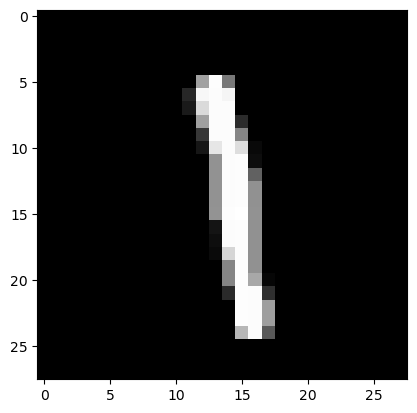

In [44]:
img20 = X_test.iloc[20]
plt.imshow(img20.values.reshape(28,28), cmap='gray')
plt.show()

### ROC 곡선 
- 임계값을 0 ~ 1까지 변화시켜가면서 
- x축 : 가짜 양성비율(FPR), y축 : 진짜 양성비율(TPR)을 표시한 곡선

- 임계값 변환에 따라 음성/양성 분류여북 달라짐, ROC 곡선도 달라짐 
- ROC 곡선 아래 면적 : AUC(Area Under the Curve)
- AUC 값이 1에 가까울수록 분류모델의 선능이 좋다고 평가 